<center><h3>Comment Count Analysis for T-Series YouTube Dataset</h3></center>

<center><h1>Introduction to T-Series</h1>
<p>Gulshan Kumar established the Indian music record label and motion 
picture production firm T-Series. T-Series also owns and runs the most popular YouTube channel, with over 248 million 
subscribers and 232 billion views overall as of September 7, 2022. </p>
<img src="./logotseries.png"></center>
<h3>Comments on YouTube videos are important because:</h3><br>
They provide viewer feedback, which is valuable for satisfying your viewers and achieving success on YouTube.<br>
They boost video engagement since they often lead back to other videos/channels that feature similar content.<br>
They present an opportunity for positive community building and engagement.<br>

<h3>The dataset used is the youtube t-series dataset with the following columns: </h3>
videoId: This column contains unique identifiers or codes for each video. These are alphanumeric strings that serve as identifiers for each video. <br>
publishedTime: This column represents the date and time when each video was published. The date and time are in the format "DD-MM-YYYY HH:MM."</br>
durationSec: This column indicates the duration of each video in seconds. It shows how long each video lasts. <br>
viewCount: This column displays the number of views each video has received. It represents the total count of how many times each video has been watched. <br>
likeCount: This column shows the number of likes (or thumbs up) that each video has received. It represents the count of users who have liked the video. <br>
dislikeCount: This column indicates the number of dislikes (or thumbs down) that each video has received. It represents the count of users who have disliked the video. <br>
commentCount: This column displays the number of comments that have been posted on each video. It represents the count of user comments associated with each video.<br>

<h3>MultiLinear Regression</h3>
Multiple linear regression (MLR) is a statistical technique that uses several explanatory variables to predict the outcome of a response varia
ble. It is an extension of linear regression that uses just one explanatory variable. Multiple linear regression is used to estimate the relationship between two or more independent variables and one dependent variable.

In [118]:
#required libraries
import numpy as np
import pandas as pd

In [119]:
#load the dataset into pandas dataframe
data=pd.read_csv("C:\\Users\\soumy\\OneDrive\\Desktop\\T-Series.csv")
data

,videoId,publishedTime,durationSec,viewCount,likeCount,dislikeCount,commentCount
0,O5X3bnTI1Go,17-05-2020 12:00,235,320360,13976.0,25966.0,3175
1,bTPt1voMr8g,17-05-2020 09:07,189,277845,33600.0,1645.0,3313
2,#NAME?,17-05-2020 10:39,376,62515,2334.0,373.0,291
3,g4Xa7WwOFw0,17-05-2020 05:30,140,117328,6043.0,604.0,685
4,tXIHXccXcCg,16-05-2020 08:31,20,996968,50636.0,2307.0,2712
...,...,...,...,...,...,...,...
831,G1D0n68lOS8,23-10-2019 08:30,243,135862,1874.0,128.0,146
832,tDHQPHCLd6c,23-10-2019 09:30,278,45847,525.0,98.0,83
833,B88D1SGN0Ig,23-10-2019 10:15,168,80220,898.0,136.0,100
834,frTgD-MC5pI,25-10-2019 05:30,153,2943938,39888.0,2534.0,1266


In [120]:
data.head()

,videoId,publishedTime,durationSec,viewCount,likeCount,dislikeCount,commentCount
0,O5X3bnTI1Go,17-05-2020 12:00,235,320360,13976.0,25966.0,3175
1,bTPt1voMr8g,17-05-2020 09:07,189,277845,33600.0,1645.0,3313
2,#NAME?,17-05-2020 10:39,376,62515,2334.0,373.0,291
3,g4Xa7WwOFw0,17-05-2020 05:30,140,117328,6043.0,604.0,685
4,tXIHXccXcCg,16-05-2020 08:31,20,996968,50636.0,2307.0,2712


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   videoId        836 non-null    object 
 1   publishedTime  836 non-null    object 
 2   durationSec    836 non-null    int64  
 3   viewCount      836 non-null    int64  
 4   likeCount      834 non-null    float64
 5   dislikeCount   834 non-null    float64
 6   commentCount   836 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 45.8+ KB


<h4>Data Preprocessing</h4>

In [122]:
data.isnull().any()

videoId          False
publishedTime    False
durationSec      False
viewCount        False
likeCount         True
dislikeCount      True
commentCount     False
dtype: bool

In [123]:
data['likeCount'].fillna(data['likeCount'].mean(),inplace=True)
data['dislikeCount'].fillna(data['dislikeCount'].mean(),inplace=True)

In [124]:
data.isnull().any()

videoId          False
publishedTime    False
durationSec      False
viewCount        False
likeCount        False
dislikeCount     False
commentCount     False
dtype: bool

<h4>Vizualizing the Data</h4>

In [125]:
import matplotlib.pyplot as plt

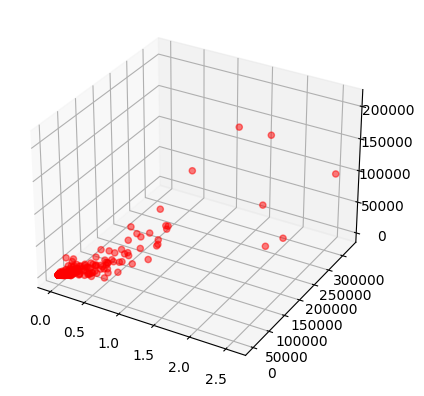

In [126]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(data['likeCount'],data['dislikeCount'],data['commentCount'],c='red',alpha=0.5)

In [127]:
#correlation analysis
corr=data.iloc[:,2:7].corr()
corr

,durationSec,viewCount,likeCount,dislikeCount,commentCount
durationSec,1.000000,-0.037876,-0.043883,-0.033498,-0.026743
viewCount,-0.037876,1.000000,0.900141,0.819763,0.598791
likeCount,-0.043883,0.900141,1.000000,0.872930,0.835181
dislikeCount,-0.033498,0.819763,0.872930,1.000000,0.802999
commentCount,-0.026743,0.598791,0.835181,0.802999,1.000000


<Axes: >

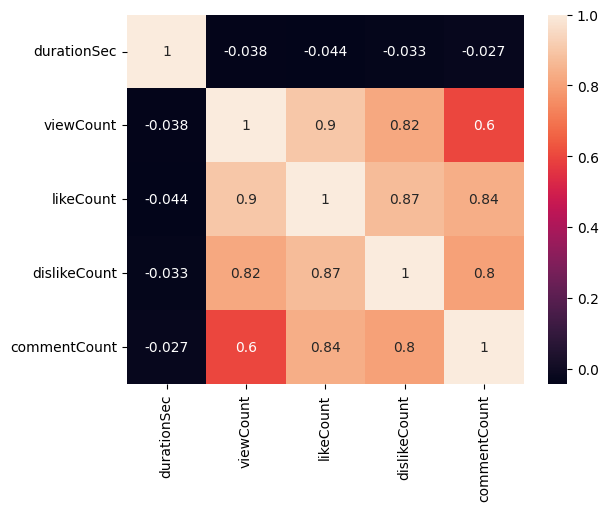

In [128]:
import seaborn as sns
sns.heatmap(corr,annot=True)

<h4>Depenedent and Independent Variables</h4>

In [129]:
x=data.iloc[:,2:6].values
x

array([[2.350000e+02, 3.203600e+05, 1.397600e+04, 2.596600e+04],
       [1.890000e+02, 2.778450e+05, 3.360000e+04, 1.645000e+03],
       [3.760000e+02, 6.251500e+04, 2.334000e+03, 3.730000e+02],
       ...,
       [1.680000e+02, 8.022000e+04, 8.980000e+02, 1.360000e+02],
       [1.530000e+02, 2.943938e+06, 3.988800e+04, 2.534000e+03],
       [2.300000e+01, 5.814430e+05, 1.521500e+04, 1.074000e+03]])

In [130]:
y=data.iloc[:,6:].values
y

array([[  3175],
       [  3313],
       [   291],
       [   685],
       [  2712],
       [   736],
       [   780],
       [  2689],
       [  1523],
       [   876],
       [   241],
       [   894],
       [   842],
       [   822],
       [   332],
       [  1203],
       [  1303],
       [  1267],
       [ 16037],
       [  1062],
       [   930],
       [  2580],
       [   406],
       [  1698],
       [  1396],
       [  1022],
       [  1040],
       [  2089],
       [   467],
       [  1336],
       [   942],
       [  1194],
       [  1038],
       [  1346],
       [   884],
       [   333],
       [  3558],
       [ 24355],
       [   272],
       [   659],
       [  1199],
       [  1397],
       [  1521],
       [  1207],
       [  4075],
       [  1247],
       [  2815],
       [  8024],
       [   462],
       [   501],
       [  1080],
       [  1007],
       [   119],
       [   361],
       [   624],
       [   809],
       [   723],
       [  8834],
       [   797

In [131]:
x.shape

(836, 4)

In [132]:
y.shape

(836, 1)

<h4>Split this data into training and testing data set</h4>

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [135]:
x_train.shape

(668, 4)

In [136]:
x_test.shape

(168, 4)

In [137]:
y_train.shape

(668, 1)

In [138]:
y_test.shape

(168, 1)

<h4>Build the model</h4>

In [139]:
from sklearn.linear_model import LinearRegression

In [140]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

<h4>Test the model</h4>

In [141]:
y_pred = mlr.predict(x_test)
y_pred

array([[   238.91251038],
       [  1422.0023255 ],
       [   299.81434734],
       [   836.9545628 ],
       [  4670.69496035],
       [  1174.52247327],
       [   246.74220261],
       [  1027.65987267],
       [  1039.84569115],
       [ 21263.51246526],
       [  1261.76179968],
       [   915.94504225],
       [   495.06629344],
       [  1814.03707863],
       [   239.00785889],
       [   720.14415727],
       [   566.84111325],
       [   651.64516928],
       [   342.86220443],
       [   273.45036346],
       [   447.15673851],
       [   663.01102196],
       [  1084.97894865],
       [  7178.84363682],
       [  3763.43105188],
       [   223.96240972],
       [   373.17996413],
       [  1051.50538957],
       [   491.81924464],
       [  1212.07507672],
       [  1085.96432679],
       [   412.52545909],
       [119222.23451575],
       [   561.75709584],
       [  1027.40339944],
       [   872.25232969],
       [  1447.95187503],
       [  1166.59157904],
       [  28

In [142]:
y_test

array([[   104],
       [   880],
       [   161],
       [  1267],
       [  2250],
       [   820],
       [   125],
       [   729],
       [   600],
       [ 11024],
       [  1523],
       [  1096],
       [   405],
       [  1266],
       [   130],
       [  1024],
       [   373],
       [   538],
       [   228],
       [   127],
       [    99],
       [   612],
       [  1501],
       [  8909],
       [  6731],
       [    66],
       [   261],
       [   791],
       [   640],
       [   672],
       [  1194],
       [   290],
       [210408],
       [   329],
       [   656],
       [   553],
       [  1087],
       [   704],
       [  2089],
       [ 27771],
       [   107],
       [   220],
       [   480],
       [  3889],
       [  1510],
       [   332],
       [   329],
       [  4517],
       [   252],
       [   809],
       [   468],
       [  2656],
       [   200],
       [  1085],
       [  2176],
       [  1880],
       [   391],
       [  1091],
       [   605

<h4>Checking r2_score (the evaluation metric)</h4>

In [143]:
from sklearn.metrics import r2_score

In [144]:
acc=r2_score(y_test,y_pred)
acc

0.8286560931566199

<h4>Predicting the comment count by giving some new value as input to the model</h4>

In [145]:
mlr.predict([[2,300,23,2]])

array([[171.64014801]])

<h4>Visualizing Actual Y(commentCount) with Predicted Y(commentCount)</h4>

Text(0.5, 1.0, 'Actual Value vs Predicted Values')

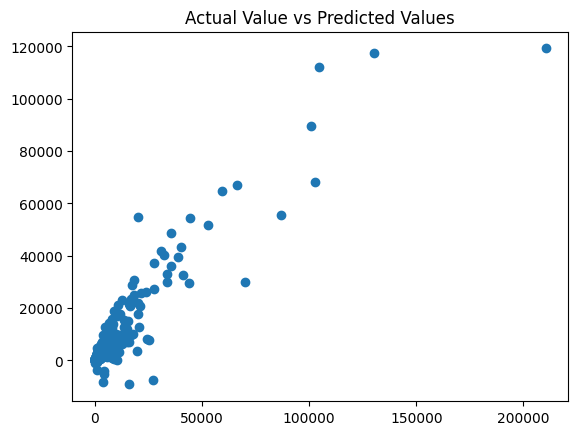

In [146]:
plt.scatter(y,mlr.predict(x))
plt.title("Actual Value vs Predicted Values")

In conclusion, an 82% R2 score indicates a reasonably good fit of MLR model to the data, that is significant portion of the variation in comment counts can be explained by the selected independent variables. Additionally, the accuracy of model can be assessed using cross validation, because there may be other unmeasured factors that influence comment counts on YouTube videos. 

In [150]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(mlr, x, y, cv=5)
print(scores)
print("Mean R2 score:", scores.mean())

[0.88765417 0.83059277 0.62261475 0.61752132 0.90362638]
Mean R2 score: 0.7724018794938097
